In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_parquet("./electric_prices.parquet")

In [10]:
DAYS_TO_FIT = 15
FIT_DATA = "price"  # Fit on price or rolling24h

# Since the data is collected every 15 minutes, we need to calculate the time to fit.
TIME_TO_FIT = DAYS_TO_FIT * 24 * 4


"""The linear regression model needs an unique index, and it doesn't work well with DateTime.
Therefor we are resetting the index twice to get a column with index values."""

if "time" not in df.columns:
    df = df.reset_index()

if "index" not in df.columns:
    df = df.reset_index()


df_to_fit = df.tail(TIME_TO_FIT)
lr = LinearRegression(fit_intercept=True)

X = df_to_fit[["index"]]
y = df_to_fit[FIT_DATA]

lr.fit(X, y)

LinearRegression()

In [11]:
df["pred_price"] = lr.predict(df[["index"]])

In [12]:
pred_df = pd.DataFrame(
    pd.date_range("2022-11-25", "2023-02-28", freq="15min"), columns=["time"]
)
pred_df = pred_df.reset_index()
pred_df["pred_price"] = lr.predict(pred_df[["index"]])

print(f"Coef: {lr.coef_}, Intercept: {lr.intercept_}")

Coef: [-0.08217728], Intercept: 439.8204416822783


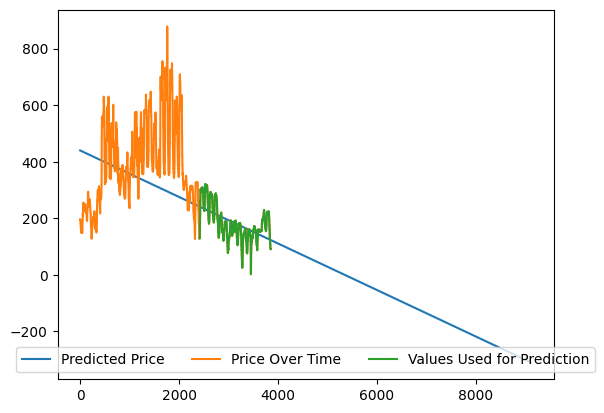

In [21]:
colors = ['#BB0000', '#0000BB', 'green']
plot_1 = pred_df["pred_price"].plot(x='time', label="Predicted Price")
df[FIT_DATA].plot(x="time", ax=plot_1, label="Price Over Time")
df_to_fit[FIT_DATA].plot(x='time',ax=plot_1, label="Values Used for Prediction")
ax.set_title(f"Linear Regression Predicting Electric Prices on {FIT_DATA}")

plt.legend(loc="lower center", ncols=3)
plt.show()